## Black Friday Sales 

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# Import Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
# Check for null values 
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# Checking Proportions of Female buyers and male buyers 
train.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
# Checking proportions of customers based on their marital status
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [11]:
# Max Purchase
train.Purchase.max()

23961

In [12]:
# Min Purchase
train.Purchase.min()

12

# Exploratory Data Analysis

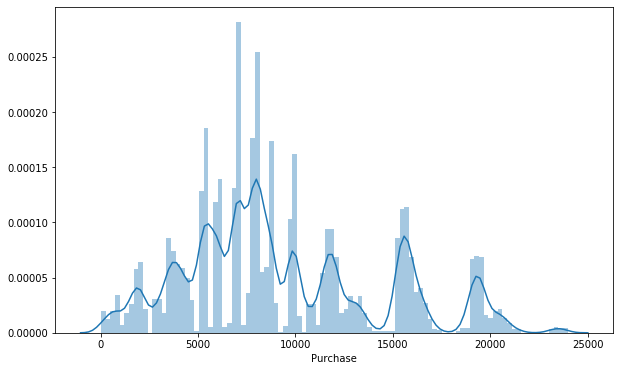

In [13]:
# Distribution of the Target Variable 
plt.figure(figsize=(10,6))
sns.distplot(train.Purchase, bins=100)

In [14]:
#FInding Skewness and Curtosis 

train.Purchase.skew(), train.Purchase.kurt()

(0.6001400037087128, -0.3383775655851702)

In [15]:
#Numeric VAriables 

num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

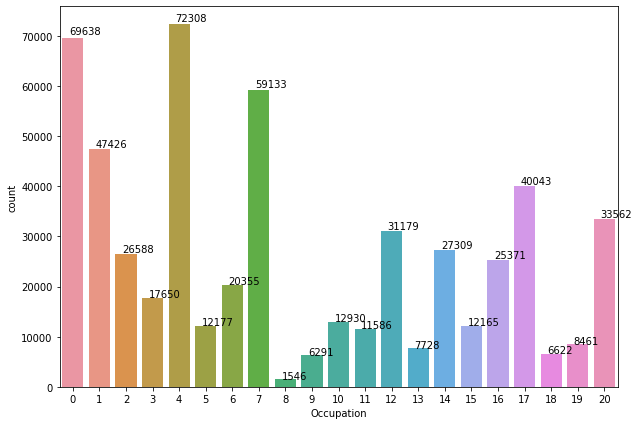

In [16]:
#Occupation Variable 
plt.figure(figsize=(10,7))
ax = sns.countplot(train.Occupation)
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

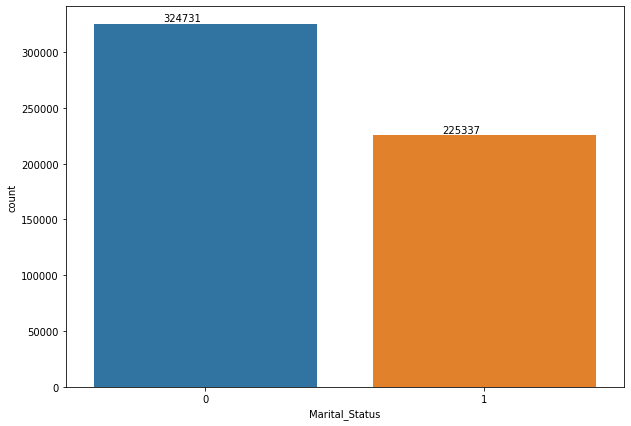

In [17]:
#Marital Status 

plt.figure(figsize=(10,7))
ax = sns.countplot(train.Marital_Status)
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

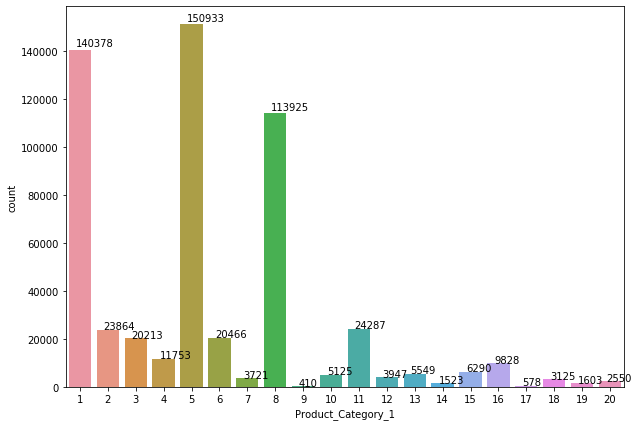

In [18]:
#Product_Category_1

plt.figure(figsize=(10,7))
ax = sns.countplot(train.Product_Category_1 )
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

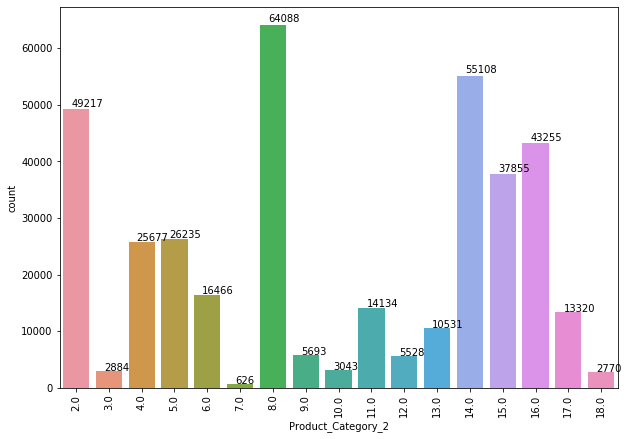

In [19]:
#Product Category 2

plt.figure(figsize=(10,7))
ax = sns.countplot(train.Product_Category_2)
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

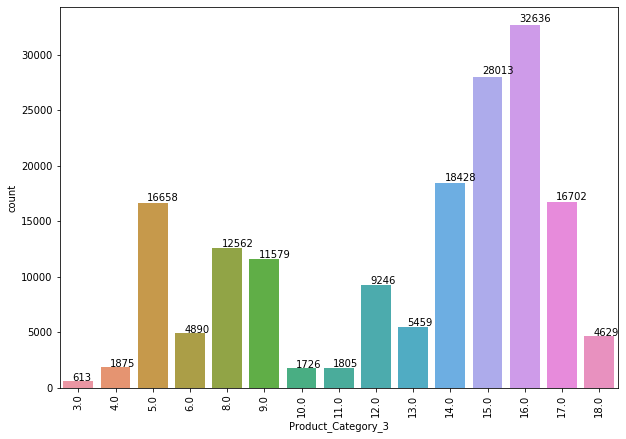

In [20]:
plt.figure(figsize=(10,7))
ax = sns.countplot(train.Product_Category_3
                  )
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))
plt.xticks(rotation = 90)

In [21]:
#Correlation between Target variable and Numeric predictors 

corr = num_features.corr()

In [22]:
print(corr['Purchase'].sort_values(ascending = False))

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


In [23]:
# Categorical Prediction 



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

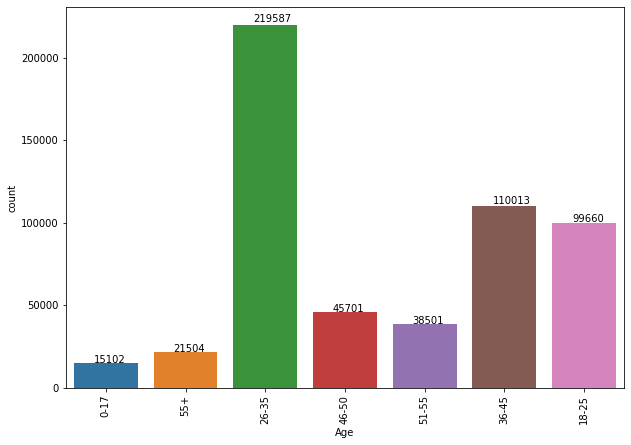

In [24]:
# Age 
plt.figure(figsize=(10,7))
ax = sns.countplot(train.Age)
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))
plt.xticks(rotation = 90)

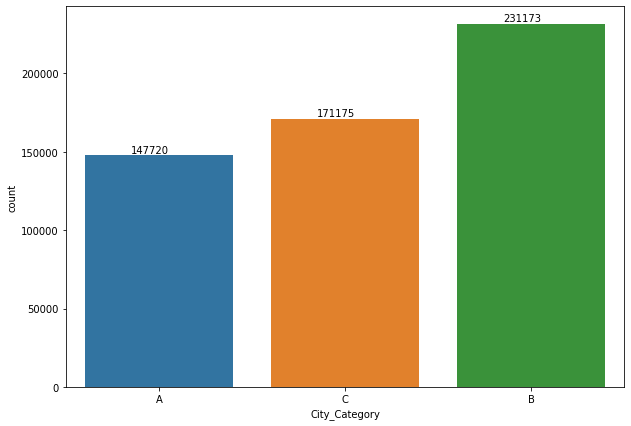

In [25]:
#City_Category
plt.figure(figsize=(10,7))
ax = sns.countplot(train.City_Category)
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))


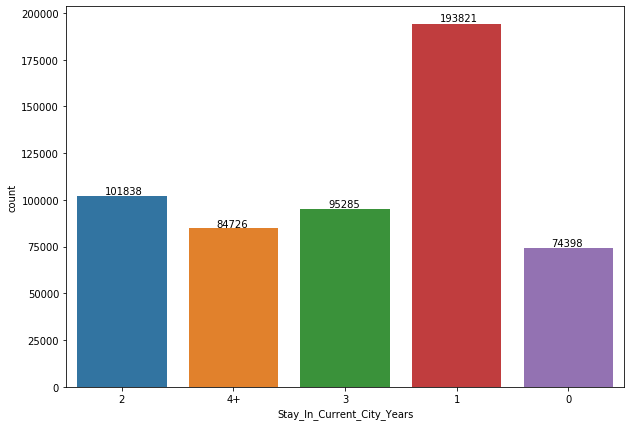

In [26]:
#Stay in Current City Years
plt.figure(figsize=(10,7))
ax = sns.countplot(train.Stay_In_Current_City_Years) 
for p in ax.patches:
    ax.annotate (p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

# Bivariate Analysis

In [27]:
#Occupation and Purchase analysis 

occupation_pivot = train.pivot_table(index= 'Occupation', values= 'Purchase', aggfunc=np.mean)
occupation_pivot

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


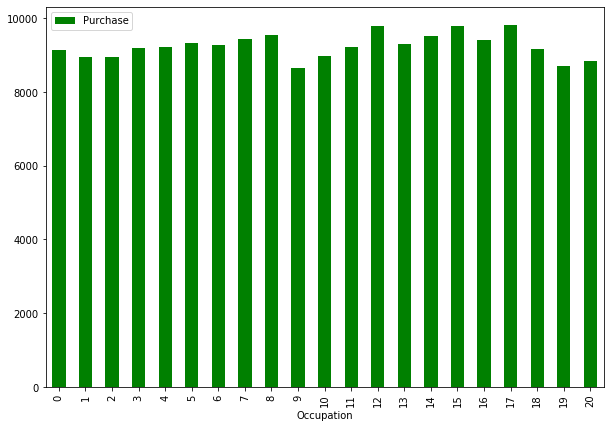

In [28]:
occupation_pivot.plot(kind= 'bar', color='Green', figsize=(10,7))

In [29]:
# Marital Status and Purhase Analysis 

marital_status_pivot = train.pivot_table(index= 'Marital_Status', values= 'Purchase', aggfunc=np.mean)
marital_status_pivot

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


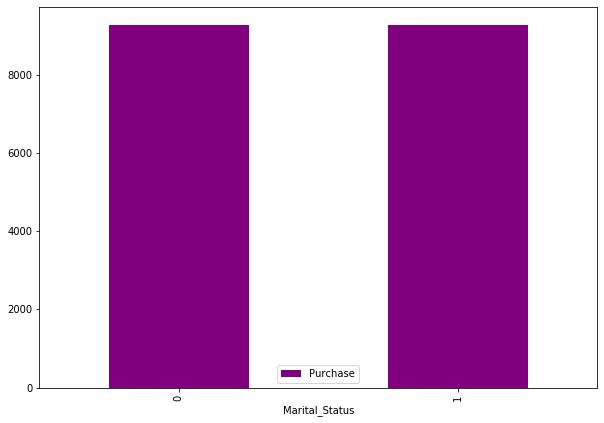

In [30]:
marital_status_pivot.plot(kind= 'bar', color='Purple', figsize=(10,7))

In [31]:
# Product_Category_1 and Purchase analysis
product_category_1_pivot = train.pivot_table(index= 'Product_Category_1', values= 'Purchase', aggfunc=np.mean)
product_category_1_pivot

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


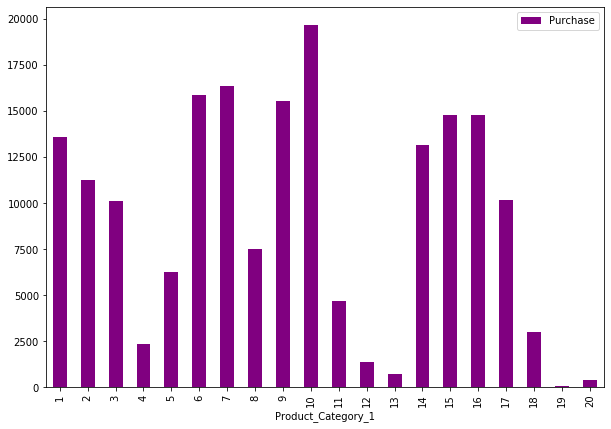

In [32]:
product_category_1_pivot.plot(kind= 'bar', color='Purple', figsize=(10,7))

In [33]:
product_category_1_pivot = train.pivot_table(index= 'Product_Category_1', values= 'Purchase', aggfunc=np.sum)
product_category_1_pivot

,Purchase
Product_Category_1,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


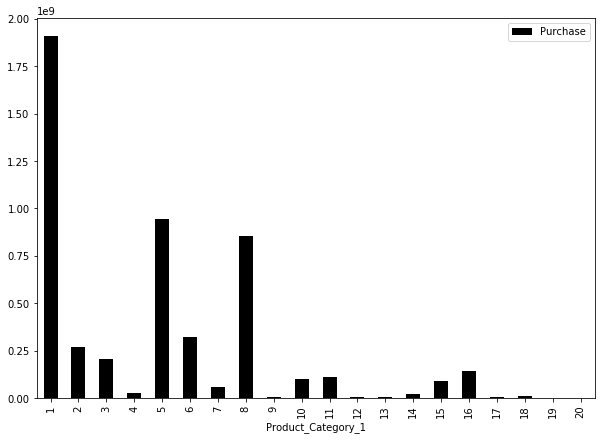

In [34]:
product_category_1_pivot.plot(kind= 'bar', color='black', figsize=(10,7))

In [35]:
product_category_2_pivot = train.pivot_table(index= 'Product_Category_2', values= 'Purchase', aggfunc=np.mean)
product_category_2_pivot

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


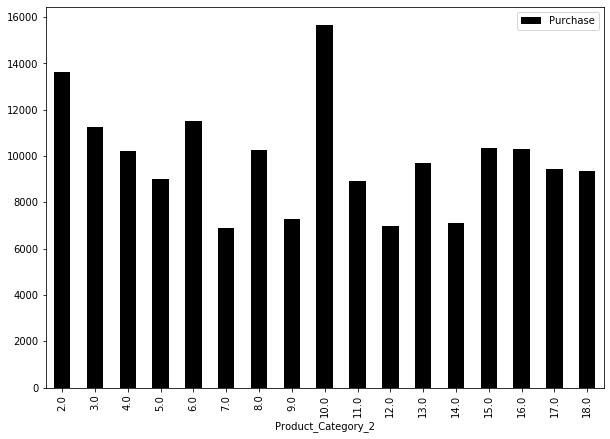

In [36]:
product_category_2_pivot.plot(kind= 'bar', color='black', figsize=(10,7))

In [37]:
product_category_3_pivot = train.pivot_table(index= 'Product_Category_3', values= 'Purchase', aggfunc=np.mean)
product_category_3_pivot

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


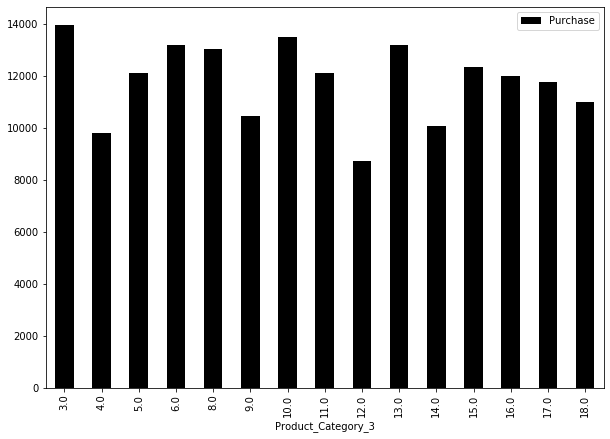

In [38]:
product_category_3_pivot.plot(kind= 'bar', color='black', figsize=(10,7))

In [39]:
# Gender and Purchase analysis
gender_pivot = train.pivot_table(index= 'Gender', values= 'Purchase', aggfunc=np.mean)
gender_pivot

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [40]:
# City Category and purchase analysis

city_category_pivot = train.pivot_table(index= 'City_Category', values= 'Purchase', aggfunc=np.mean)
city_category_pivot

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


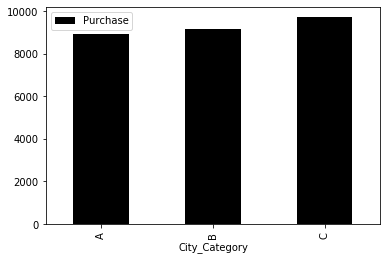

In [41]:
city_category_pivot.plot(kind='bar', color='black')

In [42]:
#Stay in Current city yearas and purchase analysis

stay_in_current_city_years_pivot = train.pivot_table(index= 'Stay_In_Current_City_Years', values= 'Purchase', aggfunc=np.mean)
stay_in_current_city_years_pivot

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4+,9275.598872


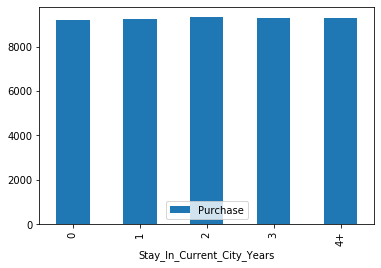

In [43]:
stay_in_current_city_years_pivot.plot(kind='bar')

# Data Preprocessing 

In [44]:
#JOin train and test datasets

train['source'] = 'train'
test['source'] = 'test'

In [45]:
data = pd.concat([train,test], ignore_index= True, sort = False)

In [46]:
print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [47]:
# fill the misssing values

data.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [48]:
data.fillna(method='ffill', inplace = True)

In [49]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            1
Product_Category_3            1
Purchase                      0
source                        0
dtype: int64

In [50]:
data.fillna(method='bfill', inplace = True)

In [51]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
source                        0
dtype: int64

In [52]:
# Unique Values

col = list(data.columns)
for i in col:
    print(data[i].unique())

[1000001 1000002 1000003 ... 1004113 1005391 1001529]
['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842']
['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
[ 8370. 15200.  1422. ...   135.   123.   613.]
['train' 'test']


In [53]:
# REmoving Product category 1 group 19 & 20 from train as this is not in product category 2 & 3 

condition = data.index[(data.Product_Category_1.isin([19,20])& (data.source=='train'))]

In [54]:
data = data.drop(condition)

In [55]:
data.shape

(779514, 13)

# Feature Engineering 

In [56]:
# COnvert GEnder to Binary

gender_dict= {'F':0, 'M':1}
data['Gender'] = data['Gender'].apply(lambda x: gender_dict[x])

In [57]:
data.Gender.value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

In [58]:
# Convert Age to Numerical values

age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data['Age']= data['Age'].apply(lambda x: age_dict[x])

In [59]:
data.Age.value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

In [60]:
# Convert City category to to binary 

city_dict = {'A':0, 'B':1, 'C':2}
data['City_Category'] = data['City_Category'].apply(lambda x: city_dict[x])

In [61]:
data['City_Category'].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

In [62]:
# Convert Stay IN current years to binary 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'] )


In [63]:
data['Stay_In_Current_City_Years'].value_counts()

1    274937
2    144599
3    134750
4    120054
0    105174
Name: Stay_In_Current_City_Years, dtype: int64

In [64]:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'] )

In [65]:
data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [66]:
# Divide data into Train and TEst 

train = data.loc[data['source']=='train']
test = data.loc[data['source']== 'test']

In [67]:
train.shape, test.shape

((545915, 17), (233599, 17))

In [68]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'source',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4'],
      dtype='object')

In [69]:
X = train.drop(['User_ID', 'Product_ID','Purchase','source'], axis=1)
y= train['Purchase']

In [70]:
test = test.drop('Purchase', axis=1)

In [71]:
test.shape

(233599, 16)

# Modelling 

In [72]:
from sklearn.model_selection import train_test_split 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8)

In [74]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(436732, 13) (109183, 13) (436732,) (109183,)


In [75]:
#Linear Regression 

from sklearn.linear_model import LinearRegression 
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_predict = Lr.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
mean_squared_error = mean_squared_error(y_test,y_predict)
mean_absolute_error = mean_absolute_error(y_test, y_predict)

In [79]:
print(mean_squared_error, mean_absolute_error)

22228114.54177251 3623.432411066741
